<img src="https://www.ikiam.edu.ec/img/logo-ikiam-grey.png" width=300 height=240 />

# EXAMEN PARCIAL PYTHON
    

## GBI6-2021II: BIOINFORMÁTICA

**Gaibor Cobos Sarai Josabeth** 
**22-02-2021**

### REQUERIMIENTOS PARA EL EXAMEN
Para este examen se requiere dos documentos: 

1. Archivo ```miningscience.py``` donde tendrá dos funciones:

2. Archivo ```2021II_GBI6_ExamenParcialPython``` donde se llamará las funciones y se obtendrá resultados.

## Ejercicio 1 [2 puntos]
Cree el archivo ```miningscience.py``` con las siguientes dos funciones:
    
i. ```download_pubmed```: para descargar la data de PubMed utilizando el **ENTREZ** de Biopython. El parámetro de entrada para la función es el ```keyword```. 
    
ii. ```mining_pubs```: esta función debe utilizar el módulo **re** y utilizar el párametro ```tipo``` para realizar lo siguiente:
        
* Si el tipo es "DP" recupera el año de publicación del artículo. El retorno es un *dataframe* con el **PMID** y el **DP_year**.
      
* Si el tipo es "AU" recupera el número de autores por **PMID**. El retorno es un *dataframe* con el **PMID** y el **num_auth**. 
      
* Si el tipo es "AD" recupera el conteo de autores por país. El retorno es un *dataframe* con el **country** y el **num_auth**. 

* *Puede utilizar un ```if``` dentro de la función.* 

* *Cree un docstring para cada función.* 

Luego de crear las funciones, cargue el módulo ```miningscience``` como ```msc``` e imprima docstring de cada función.




In [2]:
import miningscience as msc
help(msc.download_pubmed)
help(msc.mining_pubs)

Help on function download_pubmed in module miningscience:

download_pubmed(keyword)

Help on function mining_pubs in module miningscience:

mining_pubs(tipo, archivo)




## Ejercicio 2 [1 punto]


Utilice la función ```download_pubmed``` para descargar la data con el keyword ```Ecuador genomics``` e imprima lo siguiente: 

```python
'El número de artículos es: xx' # xx corresponde al número de artículos recuperados

'El PMID del primer artículo es: xxxxxxxx' # xxxxxxxx corresponde al ID del artículo en PUDMED

```

In [3]:
import re
iv=msc.download_pubmed('Ecuador genomics[title/abstract]')
ni=re.findall(r'[DIMP]{4}\-.*\d\n',iv)
print ('El número de artículos es: ', len(ni))
print ('El PMID del primero artículo es: ',ni[0])

El número de artículos es:  55
El PMID del primero artículo es:  PMID- 35120121



## Ejercicio 3 [1 punto]

Utilice la función ```mining_pubs``` para crear los siguientes dataframes: 

* pub_year

* pub_authors

* coutries

Muestre los dos primeros y los dos últimos registros de cada dataframe. 

In [13]:
print ('Data de pub_year')
dps=msc.mining_pubs('DP',iv)
print(dps.head(2))
print(dps.tail(2))
print ('Data de pub_authors')
au=msc.mining_pubs('AU',iv)
print(au.head(2))
print(au.tail(2))
print ('Data de countries')
j=msc.mining_pubs('AD',iv)
print(j.head(2))
print(j.tail(2))

Data de pub_year
        PMID DP_year
0   35120121    2022
1   35064679    2022
         PMID DP_year
53   19844075    2010
54   19018989    2008
Data de pub_authors
        PMID  num_auth
0   35120121        14
1   35064679         7
         PMID  num_auth
53   19844075         2
54   19018989         7
Data de countries
     Country  num_auth
0    Austria         8
1  Australia        22
         Country  num_auth
56         Samoa         1
57  South Africa         5


## Ejercicio 4 [2 puntos]

Realice la visualización de los datos del ejercicio 3. 

* ```pubyear```: utilizando el conteo artículos por año, calcule la media y la desviación estandar (asumiendo que la distribución es normal). Realice un gráfico de la distribución normal de sus datos. Coloque el título, leyenda de los ejes "x" e "y", y la leyenda de la curva (utilice las expresiones matemáticas tipos latex de ser necesario). 

* ```pub_authors```: realice un boxplot del conteo de autores por artículo. Coloque las leyendas adecuadas para cada eje y el título.  

* ```countries```: realice una nube de puntos (adaptación de su tarea), resalte al menos 3 países con flechas. Coloque las leyendas adecuadas para cada eje y el título. 


In [5]:
#Llamo a los paquetes que se van a utilizar para realizar la tabla y para graficar
#Para el literal a cque corresponde al conteo de artículos
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import csv as csv

Distribución Normal
Lista de conteo artículos-año : [1, 16, 1, 1, 7, 1, 2, 5, 8, 8, 4, 1]
Promedio:  4.583333333333333
Des. estándar :  4.386690729417285


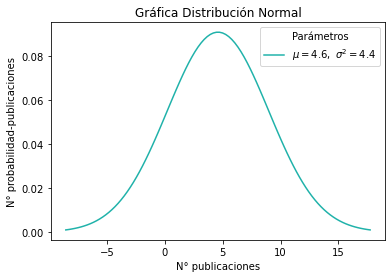

Boxplot


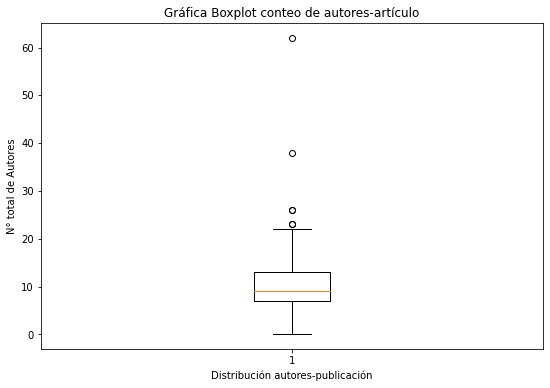

In [8]:
#LITERAL A
print ('Distribución Normal')
i = dps.iloc[:,1]
s = pd.Series(i)
o = list(set(s))
g=s
tu=o
o=[0]*len(tu)
k1=0
for elem in tu:
    d=0
    for comp in g:
        if elem == str(comp):
            d=d+1
    o[k1]=d
    k1=k1+1
print ('Lista de conteo artículos-año :',o)
media = np.average(o)
print ('Promedio: ',media)
estandar = np.std(o)
print ('Des. estándar : ',estandar)
x = np.linspace(media - 3*estandar, media + 3*estandar, 100)
sigma = estandar
label = '$\mu = %.1f, \ \sigma^2=%.1f$' %(media, estandar)
y = stats.norm.pdf(x, media, sigma)
plt.plot(x, y, label=label, c = 'lightseagreen')
plt.xlabel('N° publicaciones')
plt.ylabel('N° probabilidad-publicaciones')
plt.title('Gráfica Distribución Normal')
plt.legend(title = "Parámetros")
plt.show()

#LITERAL B
print ('Boxplot')
i = au.iloc[:,1]
s = pd.Series(i)
s1 = s.tolist()
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)
bp = ax.boxplot(s1)
plt.xlabel('Distribución autores-publicación')
plt.ylabel('N° total de Autores')
plt.title('Gráfica Boxplot conteo de autores-artículo')
plt.show()


Nube de Puntos


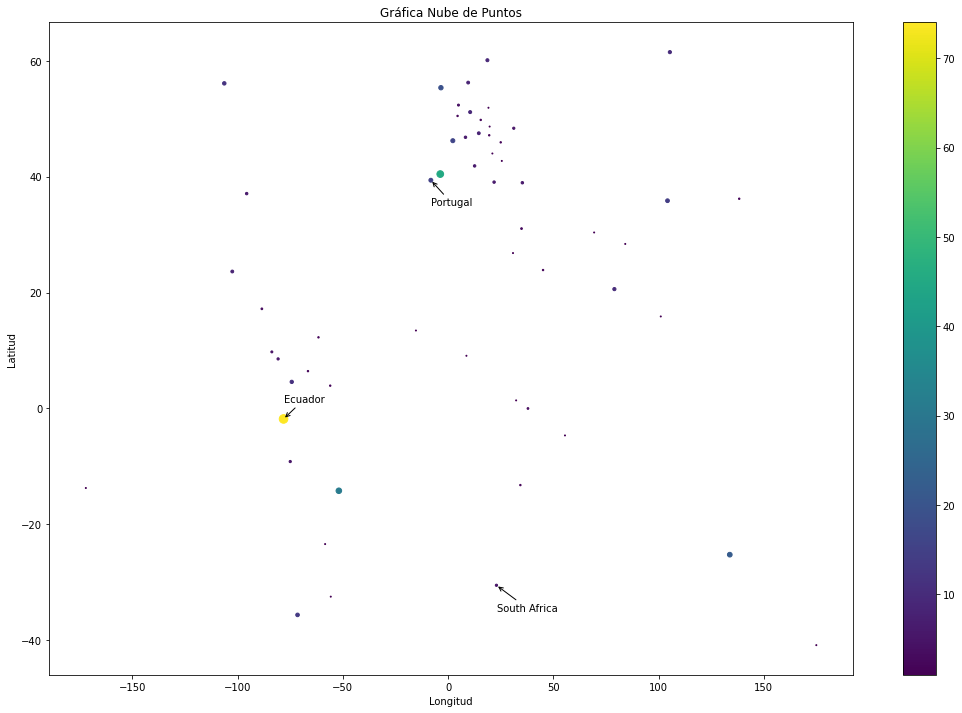

In [11]:
#LITERAL C
import matplotlib.pyplot as plot
print ('Nube de Puntos')
z= j.iloc[:,0]
su=pd.Series(z)
ip = j.iloc[:,1]
mi = pd.Series(ip)
s = mi.tolist()
coordinadas = {}
with open('Data/paises.txt') as f:
    csvr = csv.DictReader(f)
    for row in csvr:
        coordinadas[row['nombre']] = [float(row['latitud']),
                                           float(row['longitud'])]
code = []
longitud = []
latitud = []
count = s
for inte in su:
    if inte in coordinadas.keys():
        code.append(inte)
        latitud.append(coordinadas[inte][0])
        longitud.append(coordinadas[inte][1])

plt.scatter(longitud, latitud, s = count, c= count)
plt.colorbar()

ard = dict(arrowstyle="->")
plot.annotate("Portugal", xy= ( -8.224454, 39.399872), 
            xytext = (-8.33, 35), arrowprops = ard)
plot.annotate("Ecuador", xy = (-78.183406, -1.831239 ), 
            xytext = (-78.20,1), arrowprops = ard) 
plot.annotate("South Africa", xy= (22.93750, -30.559482), 
            xytext = (23, -35), arrowprops = ard)
params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0] * 3, plSize[1] * 3) )
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.title('Gráfica Nube de Puntos')
plt.show()

## Ejercicio 5 [1 punto]

Interprete los resultados del **ejercicio 4**

**Gráfica Distribución Normal**
**Gráfica Boxplot**
**Gráfica nubes de puntos**

### Escriba la respuesta del ejercicio 5


## Ejercicio 6 [2 puntos]

Para algún gen de interés, realice lo siguiente: 

1. Una búsqueda en la página del [NCBI nucleotide](https://www.ncbi.nlm.nih.gov/nucleotide/).

2. Descargue el ```Accession List``` de su búsqueda.

3. Cargue el ```Accession List``` en este notebook y haga una descarga de la data tipo ```genbank``` utilizando los diez primeros IDs de accesión. 

4. Arme un árbol filogenético para los resultados del paso 3.

5. Interprete el árbol del paso 4. 

In [3]:
#Cargo mi data en mi notebook 
#Se tomó desde el segundo ID porque al tomar el primero la cadena me presentaba problemas y no me permitía 
#correr el código correctamente.
from Bio import SeqIO 
from Bio import AlignIO
from Bio import Phylo

with open ("Data/staphy.seq","r") :
    IDs = ["D83363.1","D83362.1","L37605.1","LC654888.1","FR775756.1","FR775755.1","U02913.1","LN681574.1","HG326658.1","HG326657.1"]
from Bio import Entrez      
from Bio import Entrez
#Enlazo con la pag NCBI con los IDs requeridos.
#llamos los datos de interes, lo que obtenga lo guardaré en un archivo .gb
Entrez.email = "sarai_nj27@hotmail.com" 
ofile = open('Data/staphy_gb.gb','w')
with Entrez.efetch( db="nucleotide", rettype="gb", retmode="text", id= IDs) as handle:
    for seq_record in SeqIO.parse(handle, "gb"): 
         ofile.write(">"+str(seq_record.id)+str(seq_record.description[:50])+'\n')
         ofile.write(str(seq_record.seq)+'\n')
         ofile.write('\n')
#lo pongo en un archivo .fasta 
archivo_1=open('Data/staphy_ft.fasta','w')
with open("Data/staphy_gb.gb",'r') as genbank: 
    d=genbank.read()
    for line in d:
        archivo_1.write(str(line))
#Para alineamiento de secuencia 
from Bio.Align.Applications import ClustalwCommandline
import os
clustalw_exe = r"C:\Program Files (x86)\ClustalW2\clustalw2.exe"
clustalw_cline = ClustalwCommandline(clustalw_exe, infile = "Data/staphy_ft.fasta")
assert os.path.isfile(clustalw_exe), "Clustal_W executable is missing or not found"
stdout, stderr = clustalw_cline()
print(clustalw_cline)
# Leer alineamiento
ClustalAlign = AlignIO.read("data/staphy_ft.aln", "clustal")
print(ClustalAlign)
# Generar Dendogram (Tree)
from Bio import Phylo
tree = Phylo.read("data/staphy_ft.dnd", "newick")
Phylo.draw_ascii(tree)
#Para la construcción del árbol 
#Cargo mi alineamiento
# cargar alineamiento 
with open("data/staphy_ft.aln","r") as aln: 
    alignment = AlignIO.read(aln,"clustal")
print(type(alignment))

# Inicializar la calculadora de Distancias y del modelo 
from Bio.Phylo.TreeConstruction import DistanceCalculator 
calculator = DistanceCalculator('identity')

# Matriz de Distancias 
distance_matrix = calculator.get_distance(alignment)
print(distance_matrix)

"C:\Program Files (x86)\ClustalW2\clustalw2.exe" -infile=Data/staphy_ft.fasta
Alignment with 10 rows and 1535 columns
TAGTGGTTTGAGTTACTCCTCTGCTCAGGATGAACGCTGGCGGC...--- HG326658.1Staphylococcus
-----------------------------------TCGAGCTG-...--- HG326657.1Staphylococcus
--------------------------AGGATGAACGCTGGCGGC...--- D83363.1Staphylococcus
----------------------------GATGAACGCTGGCGGC...--- L37605.1Staphylococcus
--------------------------AGGATGAACGCTGGCGGC...--- FR775755.1Staphylococcus
--------------------------AGGATGAACGCTGGCGGC...--- D83362.1Staphylococcus
----------------------------GATGAACGCTGGCGGC...--- LC654888.1Staphylococcus
--------------------------AGGATGAACGCTGGCGGC...--- FR775756.1Staphylococcus
----------------------------GATGAACGCTGGCGGC...AGG LN681574.1Staphylococcus
--------------------------------------------...--- U02913.1Staphylococcus
     , D83363.1Staphylococcus
   __|
  |  |   __________ HG326658.1Staphylococcus
 ,|  |__|
 ||     |________ HG326657.1Staphyloco

Tree(rooted=True)
    Clade(branch_length=0, name='Inner8')
        Clade(branch_length=0.0005191368078175801, name='Inner7')
            Clade(branch_length=0.0007837947882736035, name='Inner5')
                Clade(branch_length=0.019543973941368076, name='LN681574.1Staphylococcus')
                Clade(branch_length=1.0408340855860843e-17, name='LC654888.1Staphylococcus')
            Clade(branch_length=0.0005191368078176009, name='Inner6')
                Clade(branch_length=0.004519543973941336, name='Inner3')
                    Clade(branch_length=5.4288816503822446e-05, name='D83362.1Staphylococcus')
                    Clade(branch_length=0.0005971769815418249, name='FR775755.1Staphylococcus')
                Clade(branch_length=0.00297231270358308, name='Inner4')
                    Clade(branch_length=0.0007980456026059346, name='L37605.1Staphylococcus')
                    Clade(branch_length=0.44871335504885984, name='Inner2')
                        Clade(branch_length=

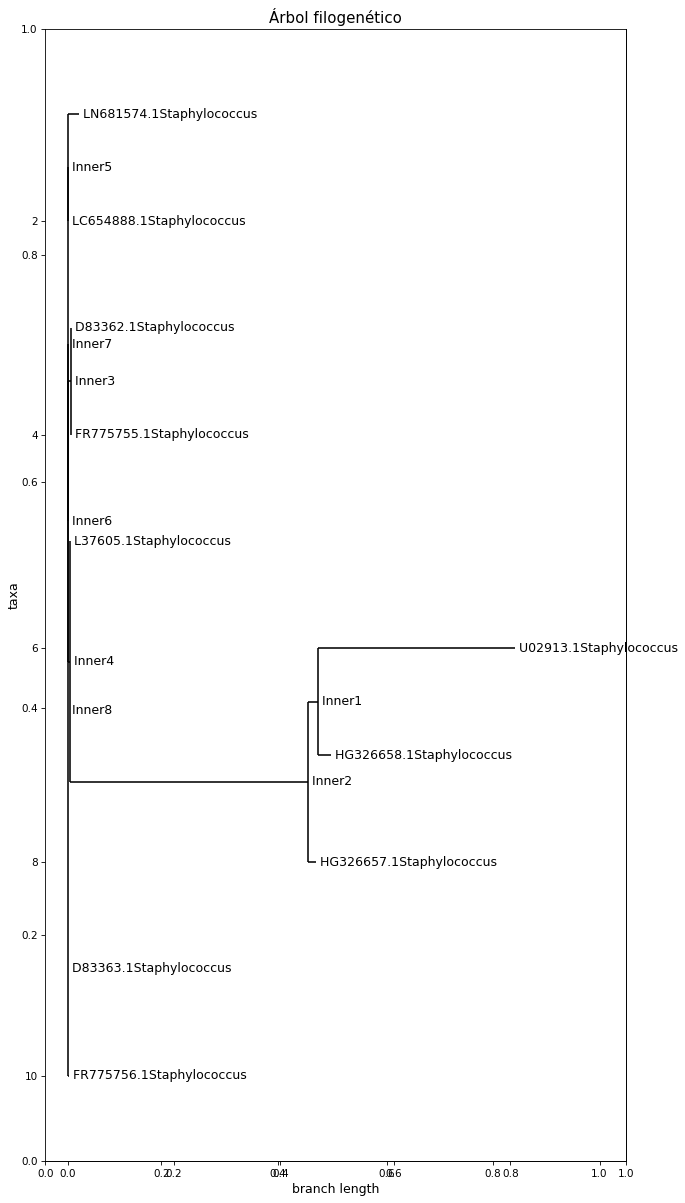

In [5]:
# Inicializar el constructor del arbol 
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
constructor = DistanceTreeConstructor(calculator)
# Construir el arbol 
staphy1_tree = constructor.build_tree(alignment)
staphy1_tree.rooted = True
print(staphy1_tree)
# Guardar el arbol 
Phylo.write(staphy1_tree, "data/staphy_tree.xml", "phyloxml")

staphy1_tree = Phylo.read(file="data/staphy_tree.xml", format= "phyloxml")

# Arbol  en Matplotlib
import matplotlib
import matplotlib.pyplot as plt

#Para tener eficiente visualización se utiliza el siguiente código 
fig = plt.figure(figsize=(10, 20), dpi=75) 
matplotlib.rc('font', size=12)              
matplotlib.rc('xtick', labelsize=10)       
matplotlib.rc('ytick', labelsize=10) 
plt.title("Árbol filogenético")   # Establece el título del gráfico

axes = fig.add_subplot(1, 1, 1)
Phylo.draw(staphy1_tree, axes=axes)
fig.savefig("data/staphy_cladogram.png")


**Staphylococcus epidermidis**  es integrante de la flora normal de piel pero produce infecciones crecientes de piel y anexos, colonizando cuerpos extraños y también es causa de infecciones profundas en huéspedes inmunocomprometidos.En cuanto a la figura del árbol filogenético se puede observar 10 cepas de S. epidermis, siete de ellas demuestran que son semejantes entre sí (LN681574, LC654888, D83362, FR775755, L37605, D83363,FR775756). Por otro lado la cepa  HG326657 tiene un distanciamiento horizonaltal a la cepa base lo que se puede inferir que no es tan semejante a ella, así mismo de la cepa HG326657 salen dos ramificaciones las cuales son HG326658 y U02913. Esta última al encontrarse más lejos en su desplazamiento horizonatal se deduce que es la más diferentes a comparación de las demás cepas. 

## Ejercicio 7 [1 punto]


1. Cree en GitHub un repositorio de nombre ```GBI6_ExamenPython```. 
2. Cree un archivo ```Readme.md``` que debe tener lo siguiente: 
- Datos personales
- Características del computador
- Versión de Python/Anaconda y de cada uno de los módulos/paquetes y utilizados
- Explicación de la data utilizada

3. Cree un directorio de nombre ```data``` donde deben estar guardado la data utilizada 
4. Realice al menos 1 control de la versión (commits) por cada ejercicio (del 1 al 6), con un mensaje que inicie como: 

```sh 
Carlitos Alimaña ha realizado .....  
```